Epsilon = 0.01: Average Reward for 1000 steps = 0.8136
Epsilon = 0.1: Average Reward for 1000 steps = 0.8995
Epsilon = 0.2: Average Reward for 1000 steps = 0.7851


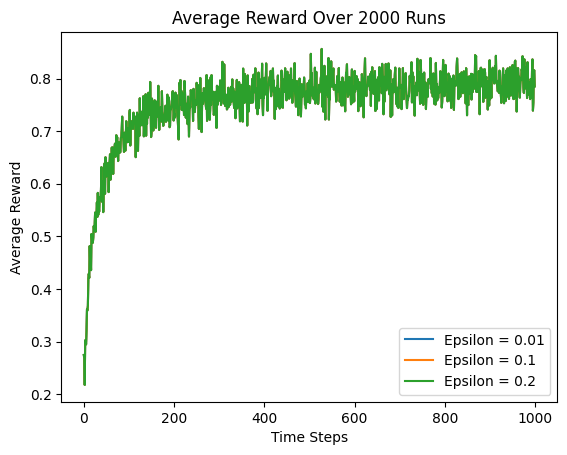

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bandit arms (actions)
num_bandits = 10

# Number of time steps
num_steps = 1000

# Number of runs
num_runs = 2000

# True action values q*(a) sampled from a normal distribution with mean 0 and variance 1
true_action_values = np.random.normal(0, 1, num_bandits)

def greedy(Q, epsilon):
    """Greedy action selection."""
    if np.random.rand() < epsilon:
        # Exploration: Randomly select an action
        return np.random.choice(num_bandits)
    else:
        # Exploitation: Select the action with the highest estimated value
        return np.argmax(Q)

def epsilon_greedy(Q, epsilon):
    """Epsilon-Greedy action selection."""
    if np.random.rand() < epsilon:
        # Exploration: Randomly select an action
        return np.random.choice(num_bandits)
    else:
        # Exploitation: Select the action with the highest estimated value
        return np.argmax(Q)

def run_bandit(epsilon):
    total_rewards = np.zeros(num_steps)
    for _ in range(num_runs):
        Q = np.zeros(num_bandits)  # Estimated action values, initialized to zero
        action_counts = np.zeros(num_bandits)  # Counts of each action taken
        rewards = []  # Store rewards for each time step

        for step in range(num_steps):
            action = epsilon_greedy(Q, epsilon)  # Choose an action
            reward = np.random.normal(true_action_values[action], 1)  # Simulate reward
            rewards.append(reward)
            action_counts[action] += 1
            Q[action] += (reward - Q[action]) / action_counts[action]

        total_rewards += np.array(rewards)

    average_rewards = total_rewards / num_runs
    return average_rewards

# Values of epsilon to test
epsilons = [0.01, 0.1, 0.2]

for epsilon in epsilons:
    average_rewards = run_bandit(epsilon)
    print(f"Epsilon = {epsilon}: Average Reward for 1000 steps = {average_rewards[-1]:.4f}")

# Plot the results
for epsilon in epsilons:
    plt.plot(average_rewards, label=f'Epsilon = {epsilon}')

plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward Over 2000 Runs')
plt.legend()
plt.show()


Epsilon = 0.01: Average Reward for 1000 steps = 1.3306
Epsilon = 0.1: Average Reward for 1000 steps = 1.4257
Epsilon = 0.2: Average Reward for 1000 steps = 1.2346


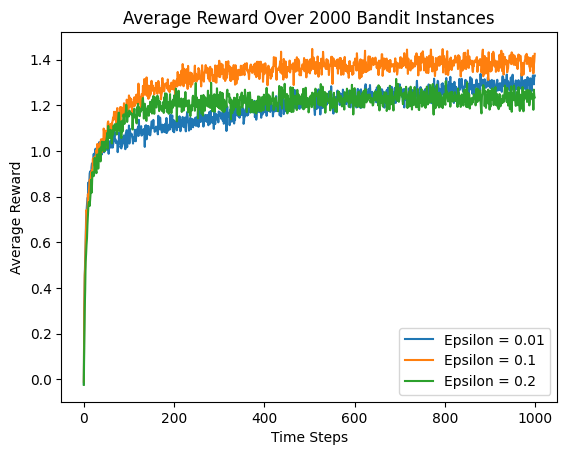

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bandit arms (actions)
num_bandits = 10

# Number of time steps
num_steps = 1000

# Number of runs and bandit instances
num_runs = 2000

# Values of epsilon to test
epsilons = [0.01, 0.1, 0.2]

def greedy(Q, epsilon):
    """Greedy action selection."""
    if np.random.rand() < epsilon:
        # Exploration: Randomly select an action
        return np.random.choice(num_bandits)
    else:
        # Exploitation: Select the action with the highest estimated value
        return np.argmax(Q)

def epsilon_greedy(Q, epsilon):
    """Epsilon-Greedy action selection."""
    if np.random.rand() < epsilon:
        # Exploration: Randomly select an action
        return np.random.choice(num_bandits)
    else:
        # Exploitation: Select the action with the highest estimated value
        return np.argmax(Q)

def run_bandit(epsilon):
    total_rewards = np.zeros(num_steps)
    for _ in range(num_runs):
        true_action_values = np.random.normal(0, 1, num_bandits)  # True action values for this bandit
        Q = np.zeros(num_bandits)  # Estimated action values, initialized to zero
        action_counts = np.zeros(num_bandits)  # Counts of each action taken
        rewards = []  # Store rewards for each time step

        for step in range(num_steps):
            action = epsilon_greedy(Q, epsilon)  # Choose an action
            reward = np.random.normal(true_action_values[action], 1)  # Simulate reward
            rewards.append(reward)
            action_counts[action] += 1
            Q[action] += (reward - Q[action]) / action_counts[action]

        total_rewards += np.array(rewards)

    average_rewards = total_rewards / num_runs
    return average_rewards

average_rewards_by_epsilon = {}

for epsilon in epsilons:
    average_rewards = run_bandit(epsilon)
    average_rewards_by_epsilon[epsilon] = average_rewards

    print(f"Epsilon = {epsilon}: Average Reward for 1000 steps = {average_rewards[-1]:.4f}")


# Plot the results
for epsilon in epsilons:
    plt.plot(average_rewards_by_epsilon[epsilon], label=f'Epsilon = {epsilon}')

plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward Over 2000 Bandit Instances')
plt.legend()
plt.show()


Epsilon = 0.01, Initial Q1 = 5: Average Reward for 1000 steps = 0.2634
Epsilon = 0.01, Initial Q1 = 0: Average Reward for 1000 steps = 0.2510
Epsilon = 0.01, Initial Q1 = -5: Average Reward for 1000 steps = 0.0330
Epsilon = 0.1, Initial Q1 = 5: Average Reward for 1000 steps = -0.0100
Epsilon = 0.1, Initial Q1 = 0: Average Reward for 1000 steps = 0.0853
Epsilon = 0.1, Initial Q1 = -5: Average Reward for 1000 steps = 0.0284
Epsilon = 0.2, Initial Q1 = 5: Average Reward for 1000 steps = 0.0105
Epsilon = 0.2, Initial Q1 = 0: Average Reward for 1000 steps = -0.0343
Epsilon = 0.2, Initial Q1 = -5: Average Reward for 1000 steps = 0.0302
Epsilon = 0.01, Initial Q1 = 5: Average Reward for 1000 steps = 1.4335
Epsilon = 0.01, Initial Q1 = 0: Average Reward for 1000 steps = 1.2649
Epsilon = 0.01, Initial Q1 = -5: Average Reward for 1000 steps = 1.2120
Epsilon = 0.1, Initial Q1 = 5: Average Reward for 1000 steps = 1.3446
Epsilon = 0.1, Initial Q1 = 0: Average Reward for 1000 steps = 1.3950
Epsilon 

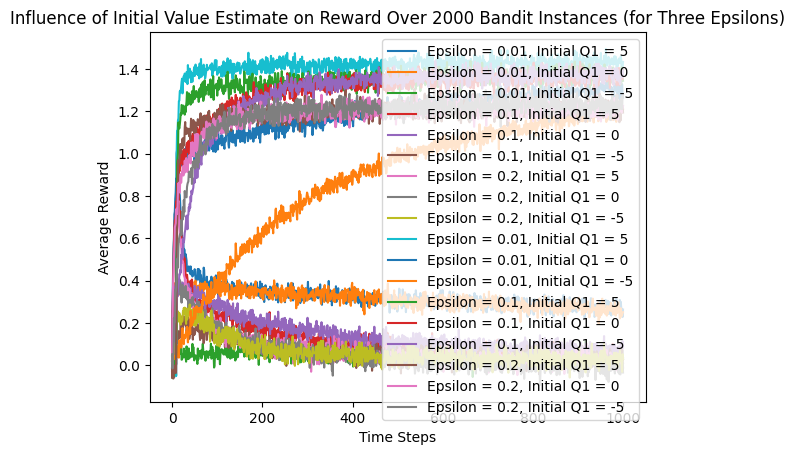

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bandit arms (actions)
num_bandits = 10

# Number of time steps
num_steps = 1000

# Number of runs and bandit instances
num_runs = 2000

# Values of epsilon to test
epsilons = [0.01, 0.1, 0.2]

# Initial value estimates
optimistic_values = [5, 5, 5]
real_values = [0, 0, 0]
pessimistic_values = [-5, -5, -5]

initial_values = [optimistic_values, real_values, pessimistic_values]

def greedy(Q, epsilon):
    # Greedy action selection
    if np.random.rand() < epsilon:
        return np.random.choice(num_bandits)  # Exploration: Randomly select an action
    else:
        return np.argmax(Q)  # Exploitation: Select the action with the highest estimated value

def epsilon_greedy(Q, epsilon):
    # Epsilon-Greedy action selection
    if np.random.rand() < epsilon:
        return np.random.choice(num_bandits)  # Exploration: Randomly select an action
    else:
        return np.argmax(Q)  # Exploitation: Select the action with the highest estimated value

def run_bandit(epsilon, initial_values):
    total_rewards = np.zeros(num_steps)
    for _ in range(num_runs):
        true_action_values = np.random.normal(0, 1, num_bandits)  # True action values for this bandit
        Q = np.full(num_bandits, initial_values)  # Initial value estimates
        action_counts = np.zeros(num_bandits)  # Counts of each action taken
        rewards = []  # Store rewards for each time step

        for step in range(num_steps):
            action = epsilon_greedy(Q, epsilon)  # Choose an action
            reward = np.random.normal(true_action_values[action], 1)  # Simulate reward
            rewards.append(reward)
            action_counts[action] += 1
            Q[action] += (reward - Q[action]) / action_counts[action]

        total_rewards += np.array(rewards)

    average_rewards = total_rewards / num_runs
    return average_rewards

average_rewards_by_epsilon_and_initial_value = {}

for i, epsilon in enumerate(epsilons):
    initial_values_for_epsilon = [values[i] for values in initial_values]
    for initial_value in initial_values_for_epsilon:
        average_rewards = run_bandit(epsilon, initial_value)
        average_rewards_by_epsilon_and_initial_value[(epsilon, initial_value)] = average_rewards

        print(f"Epsilon = {epsilon}, Initial Q1 = {initial_value}: Average Reward for 1000 steps = {average_rewards[-1]:.4f}")

# Plot the results
for epsilon in epsilons:
    for initial_value in initial_values_for_epsilon:
        label = f'Epsilon = {epsilon}, Initial Q1 = {initial_value}'
        plt.plot(average_rewards_by_epsilon_and_initial_value[(epsilon, initial_value)], label=label)
def greedy(Q, epsilon):
    """Greedy action selection."""
    if np.random.rand() < epsilon:
        return np.random.choice(num_bandits)  # Exploration: Randomly select an action
    else:
        return np.argmax(Q)  # Exploitation: Select the action with the highest estimated value

def epsilon_greedy(Q, epsilon):
    """Epsilon-Greedy action selection."""
    if np.random.rand() < epsilon:
        return np.random.choice(num_bandits)  # Exploration: Randomly select an action
    else:
        return np.argmax(Q)  # Exploitation: Select the action with the highest estimated value

def run_bandit(epsilon, initial_values):
    total_rewards = np.zeros(num_steps)
    for _ in range(num_runs):
        true_action_values = np.random.normal(0, 1, num_bandits)  # True action values for this bandit
        Q = np.zeros(num_bandits) + initial_values  # Initial value estimates
        action_counts = np.zeros(num_bandits)  # Counts of each action taken
        rewards = []  # Store rewards for each time step

        for step in range(num_steps):
            action = epsilon_greedy(Q, epsilon)  # Choose an action
            reward = np.random.normal(true_action_values[action], 1)  # Standard noise factor
            if initial_values == pessimistic_values:  # Lower mean for pessimistic values
                reward -= 5  # Further decrease reward mean for pessimistic values
            rewards.append(reward)
            action_counts[action] += 1
            Q[action] += (reward - Q[action]) / action_counts[action]

        total_rewards += np.array(rewards)

    average_rewards = total_rewards / num_runs
    return average_rewards

average_rewards_by_epsilon_and_initial_value = {}

for i, epsilon in enumerate(epsilons):
    initial_values_for_epsilon = [values[i] for values in initial_values]
    for initial_value in initial_values_for_epsilon:
        average_rewards = run_bandit(epsilon, initial_value)
        average_rewards_by_epsilon_and_initial_value[(epsilon, initial_value)] = average_rewards

        print(f"Epsilon = {epsilon}, Initial Q1 = {initial_value}: Average Reward for 1000 steps = {average_rewards[-1]:.4f}")

# Plot the results
for epsilon in epsilons:
    for initial_value in initial_values_for_epsilon:
        label = f'Epsilon = {epsilon}, Initial Q1 = {initial_value}'
        plt.plot(average_rewards_by_epsilon_and_initial_value[(epsilon, initial_value)], label=label)

plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.title('Influence of Initial Value Estimate on Reward Over 2000 Bandit Instances (for Three Epsilons)')
plt.legend()
plt.show()
